#### Prim's Algorithm

Minimum Spanning Tree Edges: [(0, 2, 3), (2, 4, 1), (4, 5, 2), (0, 1, 4), (1, 3, 2)]
Total Weight of MST: 12


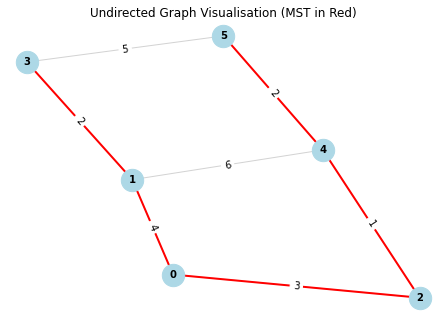

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

def create_graph(vertices):
    edges = []
    adj_list = {i: [] for i in range(vertices)}
    return {"V": vertices, "edges": edges, "adj_list": adj_list}

def add_edge(graph, u, v, weight=1):
    graph["edges"].append((u, v, weight))
    graph["adj_list"][u].append((v, weight))
    graph["adj_list"][v].append((u, weight))

def prim_mst(graph, start):
    V = graph["V"]
    visited = [False] * V
    mst_edges = []
    total_weight = 0
    pq = [(0, start, start)]  # (weight, u, v)

    while pq:
        weight, u, v = heapq.heappop(pq)
        if visited[v]:
            continue
        visited[v] = True
        if u != v:
            mst_edges.append((u, v, weight))
            total_weight += weight

        for neighbor, w in graph["adj_list"][v]:
            if not visited[neighbor]:
                heapq.heappush(pq, (w, v, neighbor))

    return mst_edges, total_weight

def draw_graph(graph, mst_edges=None):
    G = nx.Graph()

    for u, v, w in graph["edges"]:
        G.add_edge(u, v, weight=w)

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, 
            font_size=10, font_weight='bold', edge_color='lightgray')

    edge_labels = {(u, v): w for u, v, w in graph["edges"]}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')

    if mst_edges:
        mst_edge_list = [(u, v) for u, v, _ in mst_edges]
        nx.draw_networkx_edges(G, pos, edgelist=mst_edge_list, edge_color='red', width=2)

    plt.title("Undirected Graph Visualisation (MST in Red)")
    plt.show()

# An example

graph = create_graph(6)

add_edge(graph, 0, 1, 4)
add_edge(graph, 0, 2, 3)
add_edge(graph, 1, 3, 2)
add_edge(graph, 1, 4, 6)
add_edge(graph, 2, 4, 1)
add_edge(graph, 3, 5, 5)
add_edge(graph, 4, 5, 2)

source = 0
mst_edges, total_weight = prim_mst(graph, source)
print(f"Minimum Spanning Tree Edges: {mst_edges}")
print(f"Total Weight of MST: {total_weight}")

draw_graph(graph, mst_edges)
